## Context:

Today we are going to be working with the IMDB movie data set.  Our goal is to eventually create a linear regression model that will enable us to predict the box office gross of a movie based on characteristics of the movie.

Before we can start to model, we need to make sure our data is clean an in a usable format.  Therefore we will go through several steps of data cleaning. The code below is not a fully exhaustive list, but includes many of the process you will go through to clean data.  

In [1]:

import numpy as np 
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)

### Check Your Data … Quickly
The first thing you want to do when you get a new dataset, is to quickly to verify the contents with the .head() method.

In [4]:
df = pd.read_csv('movie_metadata.csv')
print(df.shape)
df.head()


(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Now let’s quickly see the names and types of the columns. Most of the time you’re going get data that is not quite what you expected, such as dates which are actually strings and other oddities. But to check upfront.

In [5]:
# Get column names
column_names = df.columns
print(list(column_names))



['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


In [6]:
# Get column data types
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

## Convert a column to a different data type

The most common example of this is converting a string of number to an actual float or integer.  There are two ways you can achieve this.  

1. astype(float) method

`df['DataFrame Column'] = df['DataFrame Column'].astype(float)`
2.  to_numeric method

`df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'],errors='coerce')`

What is the difference in these two methods?

(1) For a column that contains numeric values stored as strings;

(2) For a column that contains both numeric and non-numeric values. By setting errors=’coerce’, you’ll transform the non-numeric values into NaN.


https://datatofish.com/convert-string-to-float-dataframe/

In [7]:
df['num_critic_for_reviews'] = df['num_critic_for_reviews'].astype(str, errors='ignore')

In [8]:
df['num_critic_for_reviews'][0]

'723.0'

In [9]:
 pd.to_numeric(df['num_critic_for_reviews'],errors='coerce', downcast='integer')

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [10]:
df['num_critic_for_reviews'] =  pd.to_numeric(df['num_critic_for_reviews'],errors='coerce', downcast='integer')

In [11]:
df['title_year'][0]

2009.0

In [12]:
df['title_year']= pd.to_datetime(df['title_year'], format='%Y')

In [14]:
pd.to_datetime(df['title_year'], format='%Y')

0      2009-01-01
1      2007-01-01
2      2015-01-01
3      2012-01-01
4             NaT
          ...    
5038   2013-01-01
5039          NaT
5040   2013-01-01
5041   2012-01-01
5042   2004-01-01
Name: title_year, Length: 5043, dtype: datetime64[ns]

### Drop Columns

If you do not plan on using some data in your analysis, feel free to drop those columns. 

In [18]:
print(df.columns)

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes'],
      dtype='object')


In [16]:
df.drop(columns=['aspect_ratio', 'plot_keywords', 'color'], inplace=True)

In [17]:
df.shape

(5043, 25)

In [21]:
smaller_df=df[['gross','budget']]
smaller_df

,gross,budget
0,760505847.0,237000000.0
1,309404152.0,300000000.0
2,200074175.0,245000000.0
3,448130642.0,250000000.0
4,NaN,NaN
...,...,...
5038,NaN,NaN
5039,NaN,NaN
5040,NaN,1400.0
5041,10443.0,NaN


## Investigate the data

In [23]:
df.content_rating.head()

0    PG-13
1    PG-13
2    PG-13
3    PG-13
4      NaN
Name: content_rating, dtype: object

In [24]:
#look at the unique values for ratings
ratings = list(df['content_rating'].unique())
ratings

['PG-13',
 nan,
 'PG',
 'G',
 'R',
 'TV-14',
 'TV-PG',
 'TV-MA',
 'TV-G',
 'Not Rated',
 'Unrated',
 'Approved',
 'TV-Y',
 'NC-17',
 'X',
 'TV-Y7',
 'GP',
 'Passed',
 'M']

In [25]:
df['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

There are many unique values that don't have a high count or don't make sense to the common user.  How should we handle these?

In [26]:
#create a list of the ratings we want to group
unrated = ['Unrated','Approved', 'Not Rated', 'TV-MA', 'M', 'GP', 'Passed', np.nan, 'X', 'NC-17','TV-14', 'TV-PG', 'TV-G', 'TV-Y', 'TV-Y7']

In [27]:
#create a list of the movie ratings we want to maintian
rated = [x for x in ratings if x not in unrated]

In [28]:
rated

['PG-13', 'PG', 'G', 'R']

In [29]:
#create a dictionary with keys of the 'unrated' values and the value being 'unrated'
unrated_dict = dict.fromkeys(unrated, 'unrated')

In [30]:
unrated_dict

{'Unrated': 'unrated',
 'Approved': 'unrated',
 'Not Rated': 'unrated',
 'TV-MA': 'unrated',
 'M': 'unrated',
 'GP': 'unrated',
 'Passed': 'unrated',
 nan: 'unrated',
 'X': 'unrated',
 'NC-17': 'unrated',
 'TV-14': 'unrated',
 'TV-PG': 'unrated',
 'TV-G': 'unrated',
 'TV-Y': 'unrated',
 'TV-Y7': 'unrated'}

In [31]:
#create a dictionary of the rated values
rated_dict  = dict(zip(rated, rated))

In [32]:
rated_dict

{'PG-13': 'PG-13', 'PG': 'PG', 'G': 'G', 'R': 'R'}

In [33]:
#combine those ditionaries into 1
ratings_map = {**rated_dict,**unrated_dict}
ratings_map

{'PG-13': 'PG-13',
 'PG': 'PG',
 'G': 'G',
 'R': 'R',
 'Unrated': 'unrated',
 'Approved': 'unrated',
 'Not Rated': 'unrated',
 'TV-MA': 'unrated',
 'M': 'unrated',
 'GP': 'unrated',
 'Passed': 'unrated',
 nan: 'unrated',
 'X': 'unrated',
 'NC-17': 'unrated',
 'TV-14': 'unrated',
 'TV-PG': 'unrated',
 'TV-G': 'unrated',
 'TV-Y': 'unrated',
 'TV-Y7': 'unrated'}

#### What does `**` do? 

It basically takes the dictionary passed through and unpacks it.  

https://medium.com/understand-the-python/understanding-the-asterisk-of-python-8b9daaa4a558

https://pynash.org/2013/03/13/unpacking/

In [37]:
# use the pandas map function to change the content_rating column
df['rating'] = df['content_rating'].map(ratings_map)

In [35]:
#compare the two columns
df[['rating', 'content_rating']].tail()

,rating,content_rating
5038,unrated,NaN
5039,unrated,TV-14
5040,unrated,NaN
5041,PG-13,PG-13
5042,PG,PG


## Handling Missing Data:
    


In [38]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,33000,PG-13
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,0,PG-13
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015-01-01,393.0,6.8,85000,PG-13
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,164000,PG-13
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaT,12.0,7.1,0,unrated


In [40]:
#creates a dataframe of booleans show where data is missing
df.isna().head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,True,False,True,False,False,True,False,False,False,False,False,True,False,False,True,True,True,True,True,True,False,False,False,False


In [41]:
# Find the Percentage of rows missing data
df.isna().mean()

director_name                0.020623
num_critic_for_reviews       0.009915
duration                     0.002974
director_facebook_likes      0.020623
actor_3_facebook_likes       0.004561
actor_2_name                 0.002578
actor_1_facebook_likes       0.001388
gross                        0.175292
genres                       0.000000
actor_1_name                 0.001388
movie_title                  0.000000
num_voted_users              0.000000
cast_total_facebook_likes    0.000000
actor_3_name                 0.004561
facenumber_in_poster         0.002578
movie_imdb_link              0.000000
num_user_for_reviews         0.004164
language                     0.002380
country                      0.000991
content_rating               0.060083
budget                       0.097561
title_year                   0.021416
actor_2_facebook_likes       0.002578
imdb_score                   0.000000
movie_facebook_likes         0.000000
rating                       0.000000
dtype: float

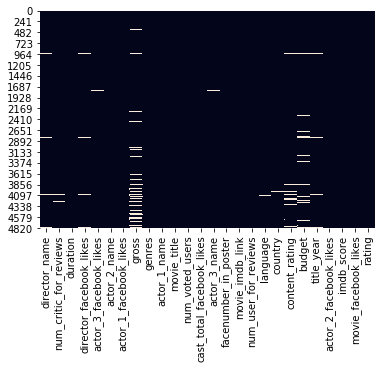

In [42]:
#graphically see the missing data
sns.heatmap(df.isna(), cbar=False)

In [43]:
df.groupby('title_year')['gross'].mean()

title_year
1916-01-01             NaN
1920-01-01    3.000000e+06
1925-01-01             NaN
1927-01-01    2.643500e+04
1929-01-01    1.408975e+06
                  ...     
2012-01-01    6.287353e+07
2013-01-01    5.615836e+07
2014-01-01    6.241214e+07
2015-01-01    6.653097e+07
2016-01-01    7.692404e+07
Name: gross, Length: 91, dtype: float64

#### Dropping missing rows

One way to handle missing data is just to drop the observation from the data set. This is not always the ideal way since you will lose obseervations, but it might be unavoidable.  For example, we want to predict the gross earnings for each film, so we have to remove those that don't have value for gross.

In [44]:
df.dropna(subset=['gross'], inplace=True)

In [45]:
df.shape

(4159, 26)

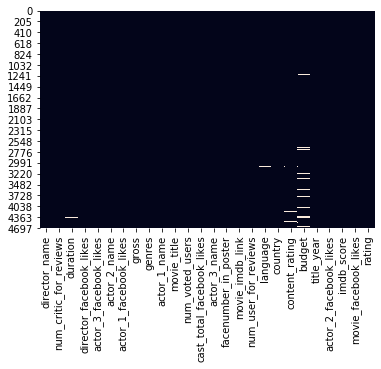

In [46]:
sns.heatmap(df.isnull(), cbar=False)

In [47]:
#look at all the observations with at least one missing data point
df[df['budget'].isna()].head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating
55,Peter Sohn,298.0,93.0,113.0,113.0,Jack McGraw,275.0,123070338.0,Adventure|Animation|Comedy|Family|Fantasy,A.J. Buckley,The Good Dinosaur,62836,696,Peter Sohn,0.0,http://www.imdb.com/title/tt1979388/?ref_=fn_t...,345.0,English,USA,PG,NaN,2015-01-01,150.0,6.8,20000,PG
444,Gary Winick,120.0,97.0,56.0,852.0,Julia Roberts,12000.0,82506325.0,Comedy|Family|Fantasy,Steve Buscemi,Charlotte's Web,27838,23907,Oprah Winfrey,0.0,http://www.imdb.com/title/tt0413895/?ref_=fn_t...,102.0,English,USA,G,NaN,2006-01-01,8000.0,6.4,0,G
477,Henry Jaglom,19.0,117.0,69.0,87.0,Stephen Dillane,898.0,821997.0,Drama|Romance,Vanessa Redgrave,Déjà Vu,666,1753,Michael Brandon,0.0,http://www.imdb.com/title/tt0119033/?ref_=fn_t...,40.0,English,USA,PG-13,NaN,1997-01-01,577.0,7.0,91,PG-13
490,Lee Tamahori,95.0,117.0,93.0,904.0,Harold Perrineau,12000.0,27779888.0,Action|Adventure|Drama|Thriller,Anthony Hopkins,The Edge,55913,14831,Bart the Bear,2.0,http://www.imdb.com/title/tt0119051/?ref_=fn_t...,182.0,English,USA,R,NaN,1997-01-01,1000.0,6.9,0,R
559,David Pastor,130.0,84.0,10.0,394.0,Kiernan Shipka,3000.0,90820.0,Drama|Horror|Sci-Fi|Thriller,Christopher Meloni,Carriers,35510,4368,Lou Taylor Pucci,0.0,http://www.imdb.com/title/tt0806203/?ref_=fn_t...,119.0,English,USA,PG-13,NaN,2009-01-01,552.0,6.0,0,PG-13


Quite a few films are still missing the values for budget. We do not want to drop this column because we believe it is an important variable, but we must have a value for each observation in order to use it.

**Talk with a partner to think of different ways you can fill in the missing budget values?**

In [48]:
#you can fill the missing values with the average value of the observations
df['budget'].fillna(df['budget'].mean(), inplace=False)

0       2.370000e+08
1       3.000000e+08
2       2.450000e+08
3       2.500000e+08
5       2.637000e+08
            ...     
5034    7.000000e+03
5035    7.000000e+03
5037    9.000000e+03
5041    4.521028e+07
5042    1.100000e+03
Name: budget, Length: 4159, dtype: float64

Another way to fill the missing data

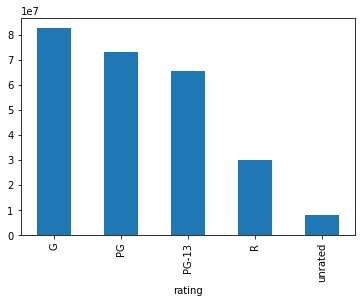

In [49]:
df.groupby('rating')['gross'].mean().plot(kind='bar')

In [50]:
budget_ratings = df.groupby('rating')['budget'].mean().round(1).to_dict()
budget_ratings

{'G': 50911615.4,
 'PG': 53575683.2,
 'PG-13': 55784951.6,
 'R': 36998505.3,
 'unrated': 12208128.2}

In [52]:
df['budget'].fillna(df['rating'].map(budget_ratings), inplace=True)


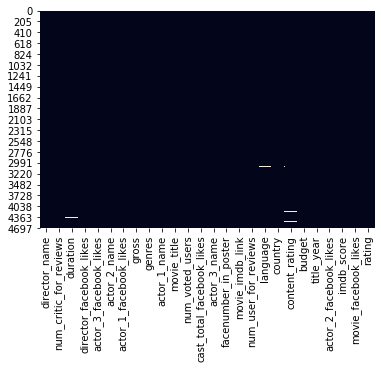

In [53]:
sns.heatmap(df.isnull(), cbar=False)

What statistical test could we use to support our use of this method?

### Handling Categorical Data

https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

In [54]:
df['rating'].value_counts()

R          1856
PG-13      1400
PG          611
unrated     197
G            95
Name: rating, dtype: int64

In [55]:
df['rating'].head(10)

0     PG-13
1     PG-13
2     PG-13
3     PG-13
5     PG-13
6     PG-13
7        PG
8     PG-13
9        PG
10    PG-13
Name: rating, dtype: object

In [57]:
pd.get_dummies(df['rating']).head(10)

,G,PG,PG-13,R,unrated
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
5,0,0,1,0,0
6,0,0,1,0,0
7,0,1,0,0,0
8,0,0,1,0,0
9,0,1,0,0,0
10,0,0,1,0,0


In [58]:
df = pd.concat([df, pd.get_dummies(df['rating'])], 1)
df.head(10)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,PG,PG-13,R,unrated
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,33000,PG-13,0,0,1,0,0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,0,PG-13,0,0,1,0,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015-01-01,393.0,6.8,85000,PG-13,0,0,1,0,0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,164000,PG-13,0,0,1,0,0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,24000,PG-13,0,0,1,0,0
6,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2,0,PG-13,0,0,1,0,0
7,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010-01-01,553.0,7.8,29000,PG,0,1,0,0,0
8,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015-01-01,21000.0,7.5,118000,PG-13,0,0,1,0,0
9,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009-01-01,11000.0,7.5,10000,PG,0,1,0,0,0
10,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,English,USA,PG-13,250000000.0,2016-01-01,4000.0,6.9,197000,PG-13,0,0,1,0,0


## Removing Outliers

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

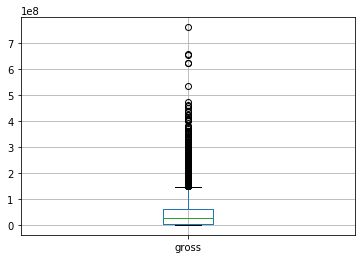

In [59]:
df.boxplot(['gross'])

In [60]:
df.sort_values('gross', ascending=False)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,PG,PG-13,R,unrated
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,33000,PG-13,0,0,1,0,0
26,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997-01-01,14000.0,7.7,26000,PG-13,0,0,1,0,0
29,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015-01-01,2000.0,7.0,150000,PG-13,0,0,1,0,0
794,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012-01-01,21000.0,8.1,123000,PG-13,0,0,1,0,0
17,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012-01-01,21000.0,8.1,123000,PG-13,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552,Ian Fitzgibbon,54.0,88.0,11.0,415.0,Brendan Coyle,1000.0,828.0,Action|Comedy|Crime|Drama|Romance|Thriller,Jim Broadbent,Perrier's Bounty,5133,2728,Michael McElhatton,8.0,http://www.imdb.com/title/tt1003034/?ref_=fn_t...,31.0,English,Ireland,R,36998505.3,2009-01-01,418.0,6.4,663,R,0,0,0,1,0
3840,Robert Sarkies,43.0,100.0,0.0,3.0,Matthew Sunderland,109.0,728.0,Crime|Drama,William Kircher,Out of the Blue,2776,122,Paul Glover,0.0,http://www.imdb.com/title/tt0839938/?ref_=fn_t...,22.0,English,New Zealand,NaN,12208128.2,2006-01-01,10.0,7.3,285,unrated,0,0,0,0,1
4606,Brian Trenchard-Smith,8.0,88.0,53.0,176.0,Mariel Hemingway,563.0,721.0,Action|Drama,David Keith,In Her Line of Fire,783,1284,Jesse Hutch,2.0,http://www.imdb.com/title/tt0487156/?ref_=fn_t...,12.0,English,Germany,R,1000000.0,2006-01-01,288.0,4.1,42,R,0,0,0,1,0
4607,Frank Whaley,9.0,96.0,436.0,4.0,Frank Whaley,474.0,703.0,Comedy|Drama,Lynn Cohen,The Jimmy Show,480,920,Heather Bucha,3.0,http://www.imdb.com/title/tt0271020/?ref_=fn_t...,21.0,English,USA,R,1500000.0,2001-01-01,436.0,5.4,47,R,0,0,0,1,0


In [61]:
# Calculate gross amount that is 3 times above the standard deviation
above_3std = df.gross.mean()+(3*df.gross.std())

### Use a conditional selection to only return values lower than 3 standard deviations above the mean

In [63]:
df[df['gross']<= above_3std]

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,PG,PG-13,R,unrated
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015-01-01,393.0,6.8,85000,PG-13,0,0,1,0,0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,24000,PG-13,0,0,1,0,0
7,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010-01-01,553.0,7.8,29000,PG,0,1,0,0,0
11,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,Kevin Spacey,Superman Returns,240396,29991,Frank Langella,0.0,http://www.imdb.com/title/tt0348150/?ref_=fn_t...,2367.0,English,USA,PG-13,209000000.0,2006-01-01,10000.0,6.1,0,PG-13,0,0,1,0,0
12,Marc Forster,403.0,106.0,395.0,393.0,Mathieu Amalric,451.0,168368427.0,Action|Adventure,Giancarlo Giannini,Quantum of Solace,330784,2023,Rory Kinnear,1.0,http://www.imdb.com/title/tt0830515/?ref_=fn_t...,1243.0,English,UK,PG-13,200000000.0,2008-01-01,412.0,6.7,0,PG-13,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,Ian Gamazon,Cavite,589,0,Quynn Ton,0.0,http://www.imdb.com/title/tt0428303/?ref_=fn_t...,35.0,English,Philippines,Not Rated,7000.0,2005-01-01,0.0,6.3,74,unrated,0,0,0,0,1
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,7000.0,1992-01-01,20.0,6.9,0,R,0,0,0,1,0
5037,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1.0,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14.0,English,USA,Not Rated,9000.0,2011-01-01,205.0,6.4,413,unrated,0,0,0,0,1
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,55784951.6,2012-01-01,719.0,6.3,660,PG-13,0,0,1,0,0


## Creating New columns based on other columns

In [ ]:
df['actor_1_facebook_likes'].describe()

In [20]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [21]:
df['total_likes'] = df.actor_1_facebook_likes + df.actor_2_facebook_likes + df.actor_3_facebook_likes

### Using np.where

In [37]:
df[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].describe()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
count,5036.000000,5030.000000,5020.000000
mean,6560.047061,1651.754473,645.009761
std,15020.759120,4042.438863,1665.041728
min,0.000000,0.000000,0.000000
25%,614.000000,281.000000,133.000000
50%,988.000000,595.000000,371.500000
75%,11000.000000,918.000000,636.000000
max,640000.000000,137000.000000,23000.000000


In [ ]:
# Create a new column called df.superstar where the value is 1
# if df.actor_1_facebook_likes is greater th000 and 0 if not
df['superstar'] = np.where(df['actor_1_facebook_likes']>=30000, 1, 0)

df[['movie_title', 'actor_1_name','actor_1_facebook_likes', 'superstar']].head(10)

### Using df.apply()

In [23]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,total_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,2791.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,46000.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,11554.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,73000.0
4,NaN,Doug Walker,nan,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN


In [29]:
df.apply(lambda row: 1 if row.total_likes> 50000 else 0, axis=1)

0       0
1       0
2       0
3       1
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      1
18      1
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      1
28      0
29      0
       ..
5013    0
5014    0
5015    0
5016    0
5017    0
5018    0
5019    0
5020    0
5021    0
5022    0
5023    0
5024    0
5025    0
5026    0
5027    0
5028    0
5029    0
5030    0
5031    0
5032    0
5033    0
5034    0
5035    0
5036    0
5037    0
5038    0
5039    0
5040    0
5041    0
5042    0
Length: 5043, dtype: int64

In [30]:
x = 1
y = 2
z = 3

In [35]:
x==2 or y==3

False

In [46]:
# create a function to apply to each row
# function will 
def superstar_movie(row):
    return row.actor_1_facebook_likes> 50000 or (row.actor_2_facebook_likes + row.actor_3_facebook_likes)>25000

In [47]:
df.apply(lambda row: superstar_movie(row), axis=1).sum()

64

**Create your own new column of data using the method above.**

In [ ]:
#your code here

Another data cleaning Resource:

https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3

## Deep Copy vs. Shallow Copy

In [49]:

#make a copy of the dataframe. 
testing = df
testing.head(2)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,total_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,2791.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,46000.0


In [51]:
#change the values for one column
testing['Director'] = 'SeanAbu'
testing.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,total_likes,Director
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,2791.0,SeanAbu
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,46000.0,SeanAbu


***Let's look back at the origianl dataframe***


In [54]:
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,total_likes,Director
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,2791.0,SeanAbu
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,46000.0,SeanAbu




We created a shallow copy of the dataframe.  What does that mean?


In [58]:
# Note you can run .copy on a df and a series
s = pd.Series([1, 2], index=["a", "b"])
deep = s.copy(deep=True)
shallow = s.copy(deep=False)


Shallow copy shares data and index with original.

In [59]:
s is shallow

False

In [60]:
s.values is shallow.values and s.index is shallow.index


True

Deep copy has own copy of data and index.

In [63]:
s is deep

False

In [62]:
s.values is deep.values or s.index is deep.index

False

Updates to the data shared by shallow copy and original is reflected in both; deep copy remains unchanged.

In [64]:
s[0] = 3
shallow[1] = 4

In [70]:
print(s, shallow, deep)



a    3
b    4
dtype: int64 a    3
b    4
dtype: int64 a    1
b    2
dtype: int64


In [74]:
print(shallow)


a    3
b    4
dtype: int64


In [73]:
print( deep)


a    1
b    2
dtype: int64
